<!-- # --- -->
<!-- title: "1.c" -->
<!-- output: pdf_document -->
<!-- always_allow_html: true -->
<!-- --- -->

c) Refaça o item b) considerando apenas as infrações registradas durante a noite. Use um mapa (“tile”) que
tenha um aspecto noturno.

Lembrando da b:
b) Considerando a infração mais recorrente, construa um mapa de calor que represente
a distribuição espacial
dos dados. Dica: Use o pacote leaflet.extras.

In [4]:
suppressPackageStartupMessages(
    library(data.table)
    )

para ler e processar arquvos grandes data.table é otimo

In [5]:
# outubroReduzido <- fread("../source/Dados_infracoes_outubro_reduzido_2019.csv", encoding = "Latin-1")
# outubroReduzido <- fread("source/Dados_infracoes_outubro_reduzido_2019.csv", encoding = "Latin-1")
outubroReduzido <- fread("https://github.com/ferroao/janejupy/raw/main/source/Dados_infracoes_outubro_reduzido_2019_5.csv")

dim(outubroReduzido)

[1] 63415    11

VAMOS remover linhas com tipo_infracao == ""

In [6]:
outubroReduzido2 <- outubroReduzido[-which(outubroReduzido$tipo_infracao=="")]

### latitude conhecida

In [7]:
outubroReduzido3 <- outubroReduzido2[-which(outubroReduzido2$auinf_local_latitude %in% c(0,"" ) ) ,]
dim(outubroReduzido3)
# 9467

[1] 9467   11

### qual a infracao mais recorrente?

In [8]:
infraFreq <- outubroReduzido3[, .(count = .N), by = list(tipo_infracao) ][order(-count)]
maisfreq<-infraFreq[1]$tipo_infracao
# 6769-0

### no meu sistema tenho que trocar , por .

In [9]:
{
  outubroReduzido3$auinf_local_latitude<-gsub("," , ".",outubroReduzido3$auinf_local_latitude)
  outubroReduzido3$auinf_local_latitude<-as.numeric(outubroReduzido3$auinf_local_latitude)

  outubroReduzido3$auinf_local_longitude<-gsub(",",".",outubroReduzido3$auinf_local_longitude)
  outubroReduzido3$auinf_local_longitude<-as.numeric(outubroReduzido3$auinf_local_longitude)
}

In [10]:
outubroReduzido1.2 <- outubroReduzido3[which(outubroReduzido3$tipo_infracao %in% maisfreq)]
dim(outubroReduzido1.2)

[1] 1362   11

# NOVO EM RELACAO A 1_B

### selecionar horarios noturnos:

In [11]:
str(outubroReduzido1.2$hora_cometimento)

 chr [1:1362] "17:49:00" "17:51:00" "18:37:00" "18:39:00" "18:40:00" ...


### convertir a formato POSIXct

ou seja, dar formato de data hora

In [12]:
outubroReduzido1.2$datahora<-paste(outubroReduzido1.2$cometimento,outubroReduzido1.2$hora_cometimento)
head(outubroReduzido1.2$datahora)

[1] "31/10/2019 17:49:00" "31/10/2019 17:51:00" "31/10/2019 18:37:00"
[4] "31/10/2019 18:39:00" "31/10/2019 18:40:00" "31/10/2019 18:40:00"

In [13]:
outubroReduzido1.2$datahora<-as.POSIXct(outubroReduzido1.2$datahora, format=  "%d/%m/%Y %H:%M:%S")

In [14]:
if (system.file(package = "lubridate") == '') {
  install.packages("lubridate")
}
suppressPackageStartupMessages(
require( lubridate )
)
# necessario para funcao hour

###  escolher horas maiores a 18 ou menores a 06

In [15]:
require( lubridate )

head(outubroReduzido1.2[ hour( datahora ) >= 18 | hour( datahora ) < 6 , ]$datahora)

outubroReduzido1.2_18_6<-outubroReduzido1.2[ hour( datahora ) >= 18 | hour( datahora ) < 6 , ]

[1] "2019-10-31 18:37:00 -05" "2019-10-31 18:39:00 -05"
[3] "2019-10-31 18:40:00 -05" "2019-10-31 18:40:00 -05"
[5] "2019-10-31 18:40:00 -05" "2019-10-31 18:44:00 -05"

### instalar se falta:

In [21]:
if (system.file(package = "leaflet") == '') {
  install.packages("leaflet")
}
if (system.file(package = "leaflet.extras") == '') {
  install.packages("leaflet.extras")
}
if (system.file(package = "htmlwidgets") == '') {
  install.packages("htmlwidgets")
}
if (system.file(package = "IRdisplay") == '') {
  install.packages("IRdisplay")
}

library(leaflet.extras)
library(htmlwidgets)
library(IRdisplay)

#install.packages("webshot")
if (system.file(package = "webshot") == '') {
              install.packages("webshot")
              webshot::install_phantomjs()
}
library(webshot)

### mapa noturno

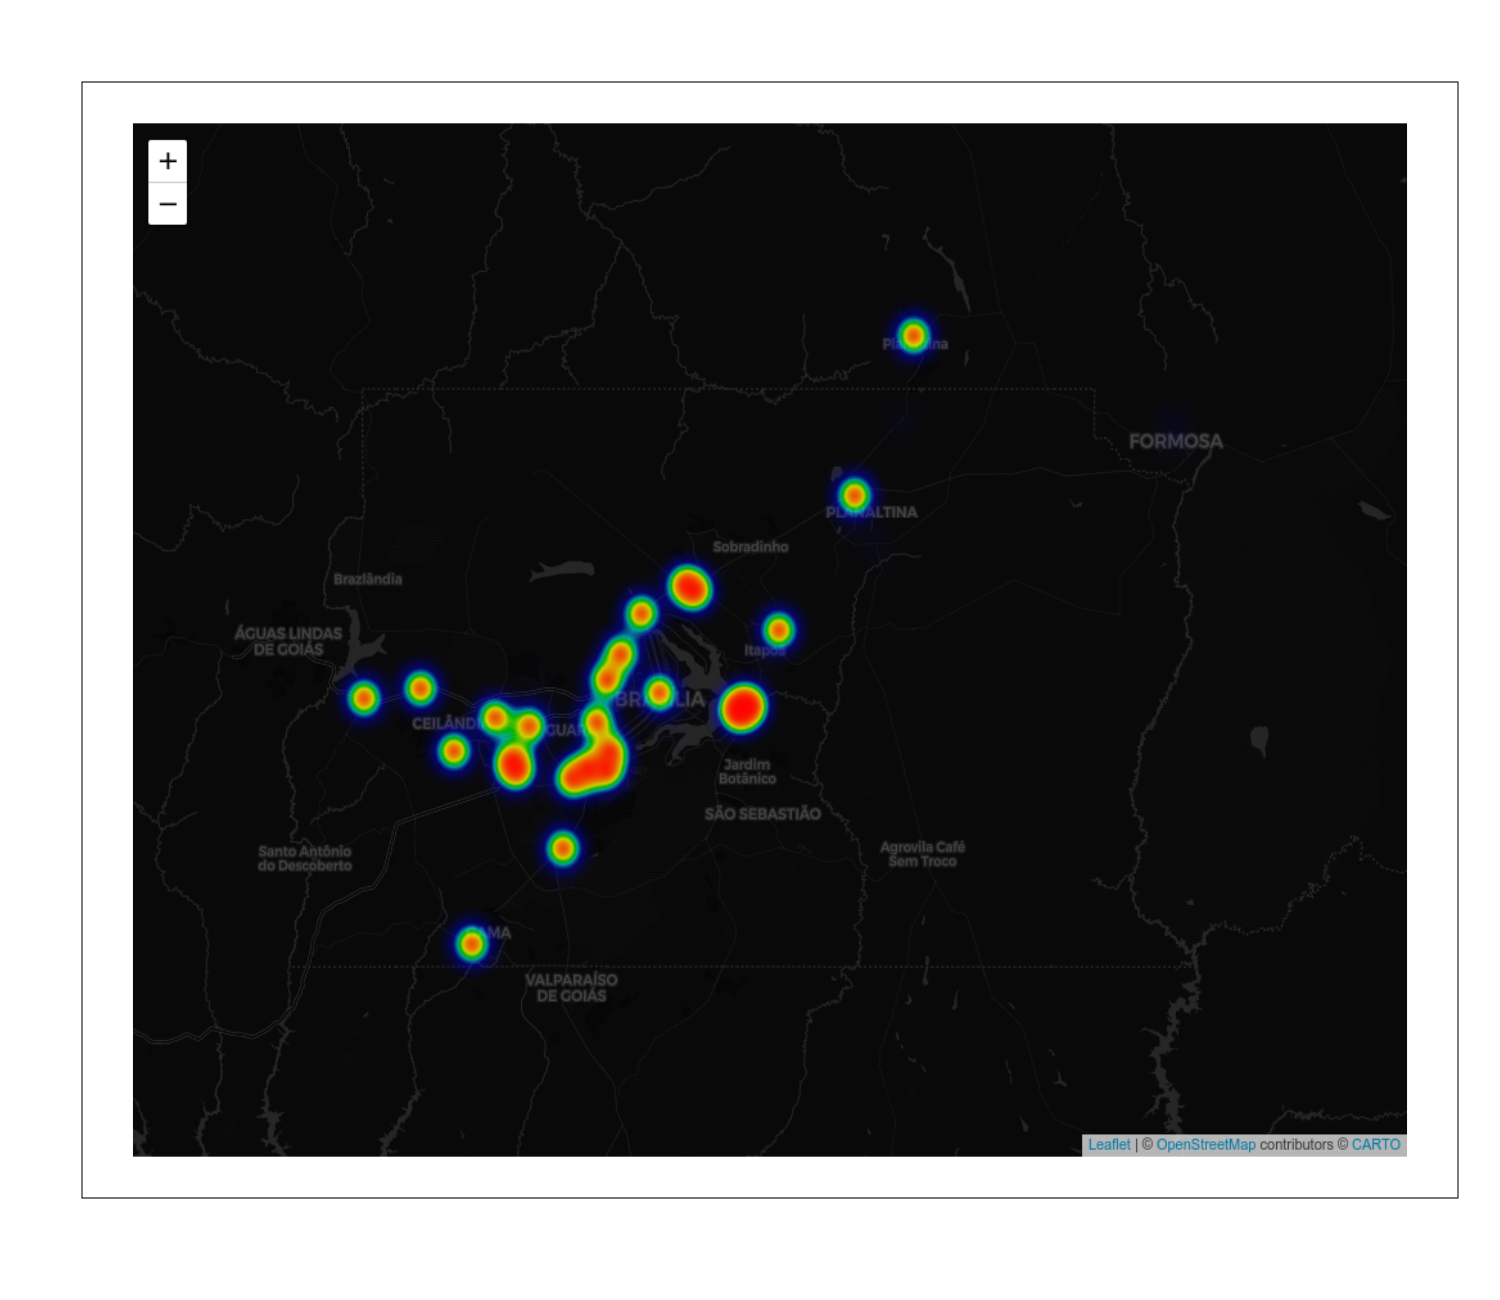

In [22]:
m1c = leaflet(data = outubroReduzido1.2_18_6) %>%
  addProviderTiles(providers$CartoDB.DarkMatter) %>%
# addTiles() %>%
  addHeatmap(
    lng = ~auinf_local_longitude
    , lat = ~auinf_local_latitude
    # , intensity = ~
    ,blur = 20, max = 0.05, radius = 15
  )

saveWidget(m1c, 'ht1c.html', selfcontained = TRUE)
#display_html('<iframe src="ht1c.html" width="500" height ="300"></iframe>')

webshot("ht1c.html", file = "Rplot1c.png")
library(png)
img <- readPNG("Rplot1c.png")
options(repr.plot.width = 15, repr.plot.height = 13, repr.plot.res = 100)
plot(NA, xlim = c(0, 7), ylim = c(0, 7), type = "n", xaxt = "n", yaxt = "n", xlab = "", ylab = "")
rasterImage(img, 0, 0, 7, 7)
